In [35]:
import pandas as pd
df = pd.read_csv('all.csv',encoding='utf-8')

In [36]:
df.head()

,texts,label,TTR,Root TTR,Log TTR,Maas TTR,MTLD,VocD,YulesK,parse_tree_depth,...,Content/Function,ISC Score,ADD Score,Average Sentence Length,Std Dev Sentence Length,nAksh,nMatra,AMCount,nPhen,nSyll
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,0.857143,4.535574,0.953739,0.013883,28.0,109.676207,102.040816,2,...,3.2,0.392857,1.600000,27.0,0.0,2.481481,1.407407,3.888889,4.185185,2.333333
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,1.000000,3.605551,1.000000,0.000000,13.0,787177.129136,0.000000,2,...,0.5,0.307692,5.000000,13.0,0.0,2.307692,1.230769,3.538462,4.230769,1.923077
2,हमे इन्तजार है ।,1,1.000000,2.000000,1.000000,0.000000,4.0,787177.129136,0.000000,1,...,1.0,0.250000,0.000000,3.0,0.0,1.750000,0.750000,2.500000,2.750000,1.500000
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,1.000000,3.316625,1.000000,0.000000,11.0,787177.129136,0.000000,2,...,1.0,0.363636,1.666667,10.0,0.0,1.636364,1.181818,2.818182,2.909091,1.545455
4,जयपुर,0,1.000000,1.000000,0.000000,0.000000,0.0,787177.129136,0.000000,0,...,0.0,0.000000,0.000000,1.0,0.0,4.000000,1.000000,5.000000,5.000000,4.000000


In [37]:
y = df['label']
X = df.drop(['label', 'texts', 'pos'], axis=1)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)  # Increased max_iter
logistic_regression.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_regression.predict(X_test_scaled)

In [42]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("\nLogistic Regression Accuracy:", accuracy_logistic)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.8940294649780305

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      3826
           1       0.90      0.89      0.89      3912

    accuracy                           0.89      7738
   macro avg       0.89      0.89      0.89      7738
weighted avg       0.89      0.89      0.89      7738



In [43]:
import numpy as np
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logistic_regression.coef_[0],
    'Abs_Coefficient': np.abs(logistic_regression.coef_[0])
})


coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

print("Logistic Regression Coefficients:")
print(coefficients)



Logistic Regression Coefficients:
                    Feature  Coefficient  Abs_Coefficient
16           words_per_sent    24.744496        24.744496
35  Average Sentence Length   -20.848495        20.848495
40                    nPhen    -4.721780         4.721780
6                    YulesK     2.248585         2.248585
22       hesitation_markers     1.998900         1.998900
3                  Maas TTR    -1.570410         1.570410
1                  Root TTR    -1.151199         1.151199
39                  AMCount     1.097906         1.097906
38                   nMatra     0.984805         0.984805
19        case_marker_count    -0.983368         0.983368
37                    nAksh     0.977610         0.977610
8             noun_count_hi    -0.863713         0.863713
17  avg_characters_per_word     0.810737         0.810737
33                ISC Score    -0.571862         0.571862
11         pronoun_count_hi     0.518015         0.518015
2                   Log TTR    -0.4219

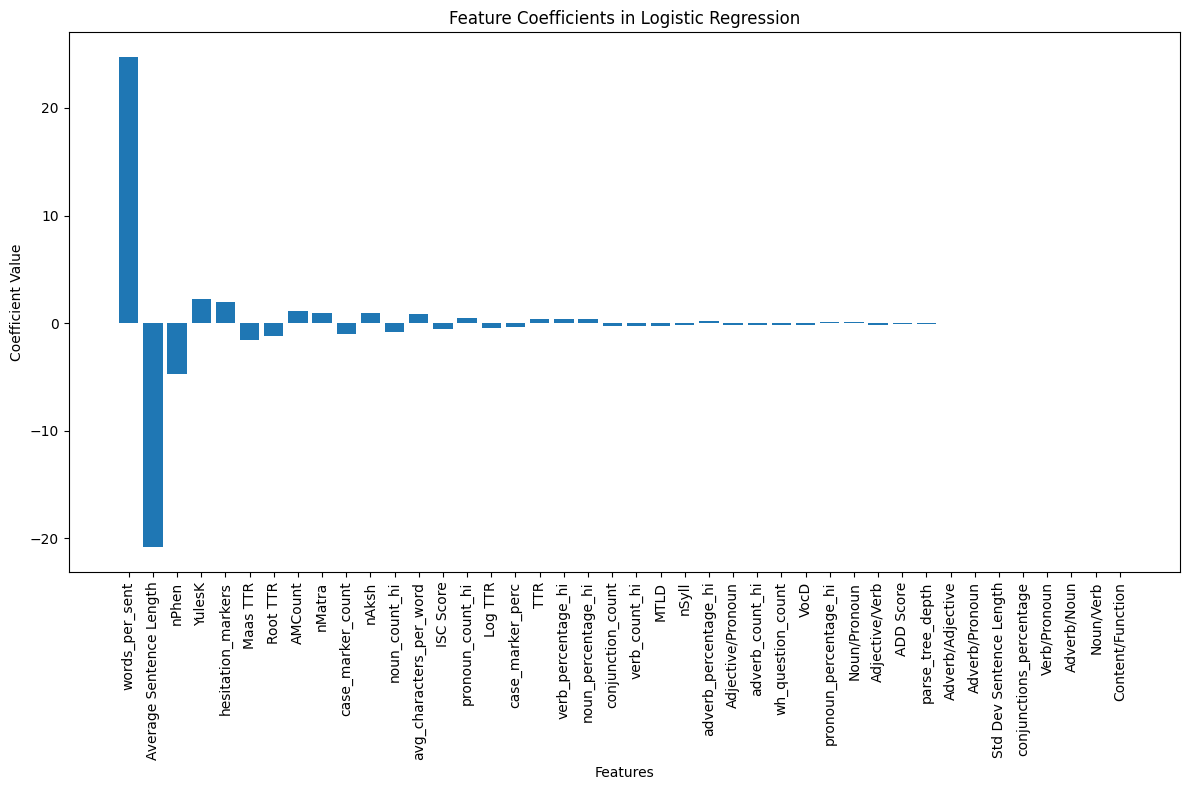

In [45]:
plt.figure(figsize=(12, 8))
plt.bar(coefficients['Feature'], coefficients['Coefficient'])
plt.xticks(rotation=90)
plt.title('Feature Coefficients in Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.savefig("feature_coefficients.png")
plt.show()

In [46]:
from google.colab import files
files.download("feature_coefficients.png") # download the file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>